DETECT SPAM MESSAGES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

In [7]:
data = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.describe()
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#Droping unwanted columns

In [11]:
data = data.drop(columns=data.columns[2:5])
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
data.columns = ['Category','Massage']
data

,Category,Massage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.isnull().sum()

Category    0
Massage     0
dtype: int64

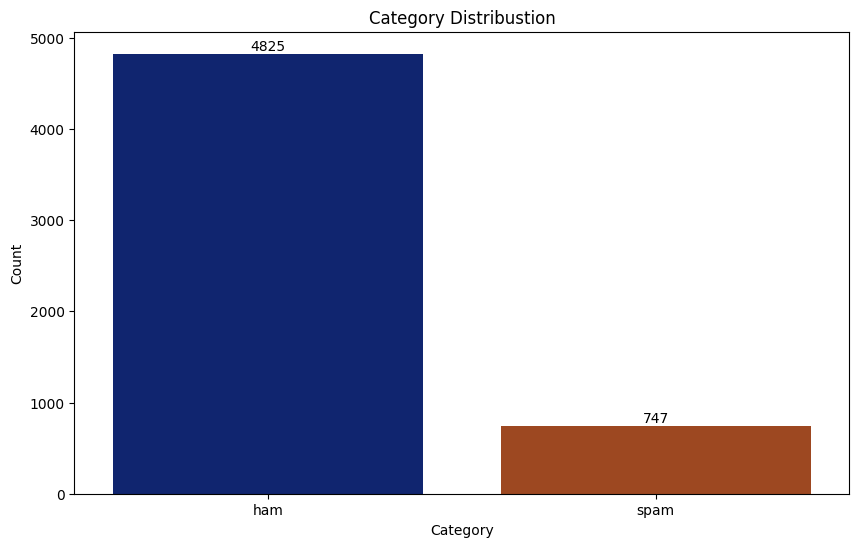

In [14]:
category_counts= data['Category'].value_counts().reset_index()
category_counts.columns = ['Category','Count']
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Count',data = category_counts, hue='Category',palette="dark", legend= False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribustion')
for i, count in enumerate(category_counts['Count']):

    plt.text(i,count,str(count),ha='center',va='bottom')
plt.show()

In [15]:
data['spam'] = data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Massage,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


traing and testing


In [16]:
X_train,X_test,y_train,y_test = train_test_split(data.Massage,data.spam,test_size= 0.2)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)


In [18]:
X_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59379 stored elements and shape (4457, 7821)>

In [19]:
model = MultinomialNB()
print(model.fit(X_train_count,y_train))

MultinomialNB()


In [20]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count,y_test)

0.989237668161435

In [21]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),('nb',MultinomialNB())
])

In [22]:
print(clf.fit(X_train,y_train))

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])


In [23]:
print(clf.score(X_test,y_test))

0.989237668161435


Now deginge the pre_build model to detect spem and not spam massages

In [24]:
pretrained_model = model
new_sentances = [
    r"Your account have 100 debeted,is waiting to be collected.simply text the password \MIX\" to 85069 to  verify.Get Usher and birthday. FML"
]
new_sentances_count = featurer.transform(new_sentances)
predictions = pretrained_model.predict(new_sentances_count)
for sentance,prediction in zip(new_sentances,predictions):
    if prediction== 1:
        print(f"{sentance} is a spam massage.")
    else:
        print(f"{sentance} is a not spam massage")

Your account have 100 debeted,is waiting to be collected.simply text the password \MIX\" to 85069 to  verify.Get Usher and birthday. FML is a spam massage.
